<h1>Load yours data</h1>

In [19]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from matplotlib import cm
import sys
import ccxt
import pandas_ta as pda
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'BTC/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 39586 candles for BTCUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [20]:
# -- Indicator variable --
ST_length_1 = 21
ST_multiplier_1 = 3.0
ST_length_2 = 19
ST_multiplier_2 = 4.0
ST_length_3 = 47
ST_multiplier_3 = 7.0

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_3, multiplier=ST_multiplier_3)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]

df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)
df['EMA90'] = ta.trend.ema_indicator(df['close'], 90)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3,STOCH_RSI,EMA90
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,0.000000,1,1,1,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,1,1,1,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,1,1,1,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,1,1,1,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 15:00:00,39209.64,39358.14,39146.56,39215.66,1334.937550,35714.658248,1,1,1,0.584664,38416.237603
2022-02-26 16:00:00,39215.66,39320.36,39036.73,39148.75,915.396840,35714.658248,1,1,1,0.582954,38432.336777
2022-02-26 17:00:00,39148.75,39309.23,39090.03,39248.58,740.572550,35714.658248,1,1,1,0.828059,38450.276188


<h1>Overbought optimizer</h1>


Loading... 42 / 42


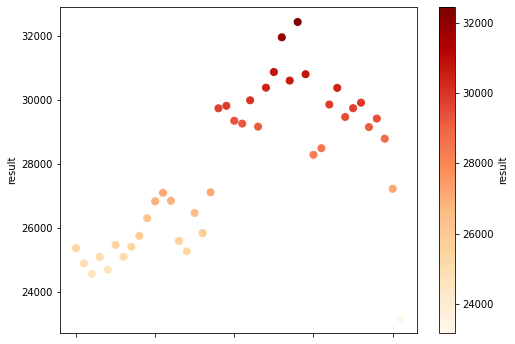

    param1        result
41   101.0  23178.702550
2     62.0  24572.394308
4     64.0  24703.193462
1     61.0  24894.241621
3     63.0  25099.811653
6     66.0  25104.904980
14    74.0  25273.936225
0     60.0  25375.506308
7     67.0  25417.082264
5     65.0  25474.317724
13    73.0  25602.929057
8     68.0  25759.197396
16    76.0  25843.638661
9     69.0  26310.921367
15    75.0  26473.381893
10    70.0  26837.501679
12    72.0  26852.589823
11    71.0  27102.940854
17    77.0  27118.391929
40   100.0  27226.539814
30    90.0  28289.562851
31    91.0  28495.044409
39    99.0  28792.137223
37    97.0  29153.724127
23    83.0  29167.285359
21    81.0  29263.508247
20    80.0  29352.911794
38    98.0  29420.534033
34    94.0  29470.254274
18    78.0  29740.229078
35    95.0  29744.289880
19    79.0  29819.354731
32    92.0  29859.250189
36    96.0  29917.030208
22    82.0  29990.664234
33    93.0  30378.617399
24    84.0  30385.536347
27    87.0  30606.340550
29    89.0  30804.753322


In [4]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

loopI = [60, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 1 optimizer</h1>

Loading... 600 / 600


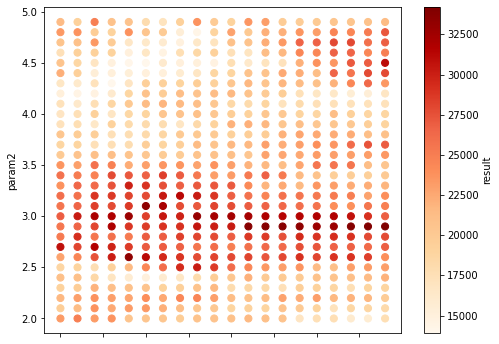

     param1  param2        result
113    13.0     4.3  13896.915689
175    15.0     4.5  13942.247274
145    14.0     4.5  14126.562414
268    18.0     4.8  14277.195779
52     11.0     4.2  14420.767133
..      ...     ...           ...
339    21.0     2.9  33740.603288
399    23.0     2.9  33788.001507
519    27.0     2.9  33938.667162
549    28.0     2.9  33982.518288
579    29.0     2.9  34191.859260

[600 rows x 3 columns]


In [13]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [10, 30, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [20, 50, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 0.88
    ST_length_1 = i
    ST_multiplier_1 = j / 10
    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_1, 'param2': ST_multiplier_1, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 2 optimizer</h1>

Loading... 210 / 210


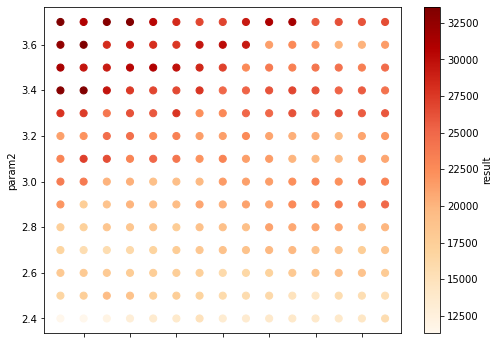

    param1  param2        result
0     15.0     2.4  11305.717340
14    16.0     2.4  11333.039813
28    17.0     2.4  11960.639764
42    18.0     2.4  12976.052158
98    22.0     2.4  13458.234365
..     ...     ...           ...
10    15.0     3.4  33209.288726
55    18.0     3.7  33319.663563
24    16.0     3.4  33465.174195
13    15.0     3.7  33533.195023
26    16.0     3.6  33571.544795

[210 rows x 3 columns]


In [15]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [15, 30, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [24, 38, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 0.88
    ST_length_1 = 21
    ST_multiplier_1 = 3.0
    
    ST_length_2 = i
    ST_multiplier_2 = j / 10

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
    dfTest['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_2, 'param2': ST_multiplier_2, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 3 optimizer</h1>

Loading... 390 / 390


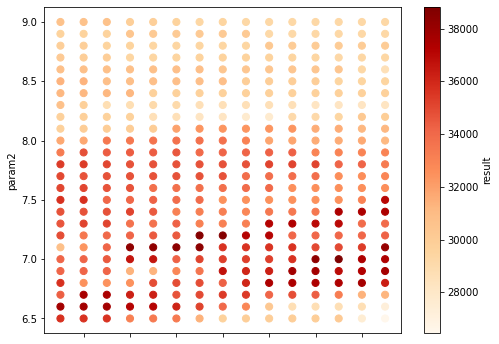

     param1  param2        result
364    49.0     6.5  26450.775013
365    49.0     6.6  27238.124053
338    48.0     6.5  27517.566961
225    43.0     8.2  27733.305069
251    44.0     8.2  27733.305069
..      ...     ...           ...
136    40.0     7.1  38418.238701
162    41.0     7.1  38418.238701
189    42.0     7.2  38634.623390
163    41.0     7.2  38634.623390
317    47.0     7.0  38812.660741

[390 rows x 3 columns]


In [16]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [35, 50, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [65, 91, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 0.88
    ST_length_1 = 21
    ST_multiplier_1 = 3.0
    
    ST_length_2 = 19
    ST_multiplier_2 = 4.0

    ST_length_3 = i
    ST_multiplier_3 = j / 10

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
    dfTest['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_3, multiplier=ST_multiplier_3)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]
    dfTest['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_3, 'param2': ST_multiplier_3, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>EMA optimizer</h1>

Loading... 171 / 171


/home/eliott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


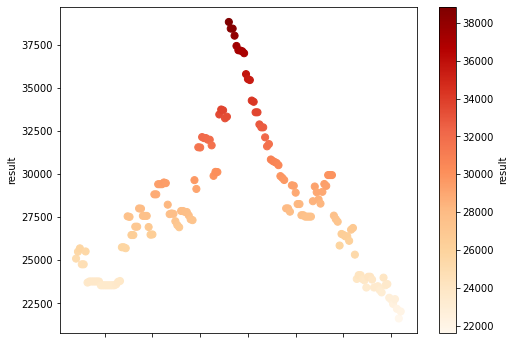

     param1        result
169   179.0  21631.401333
170   180.0  22038.077328
168   178.0  22190.956235
166   176.0  22476.484919
165   175.0  22729.932798
..      ...           ...
84     94.0  37423.491337
83     93.0  38018.588587
81     91.0  38428.492507
82     92.0  38428.492507
80     90.0  38812.660741

[171 rows x 2 columns]


In [21]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

loopI = [10, 181, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = 0.88
  dfTest['EMA'] = ta.trend.ema_indicator(df['close'], i)

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))